This notebook performs color correction on an image by calculating differences in LAB values for each color square. RGB values are extracted manually via the dropper tool in photo-editing software.

In [1]:
import numpy as np
from skimage import color, io
from skimage.color import rgb2lab, lab2rgb

import matplotlib.pyplot as plt

In [2]:
# COLOR CODES (BASE)
# Obtained by using Photoshop dropper tool on reference image
orange = (209, 81, 52)
green = (77, 152, 57)
blue = (73, 92, 148)
red = (150, 42, 65)
yellow = (190, 168, 49)
light_blue = (61, 116, 183)
black = (27, 29, 24)

In [3]:
original_colors = [orange, green, blue, red, yellow, light_blue, black]

In [4]:
# Convert RGB to LAB
original_colors_rgb = np.array(original_colors) / 255.0  # Normalize RGB values
original_colors_lab = color.rgb2lab(original_colors_rgb)

print(original_colors_lab)

[[ 51.48739853  49.00699801  42.53110693]
 [ 56.4155081  -41.77372985  41.88403012]
 [ 39.92861888   9.18817494 -33.05092282]
 [ 35.05022753  46.26428318  12.38418832]
 [ 68.87867782  -4.78451703  60.59387092]
 [ 48.13371729   3.68218159 -40.75503751]
 [ 10.39175418  -2.18137897   3.1285376 ]]


In [5]:
# COLOR CODES (SAMPLE)
# Obtained by using Photoshop dropper tool on reference image
orange = (211, 76, 46)
green = (32, 113, 28)
blue = (25, 53, 107)
red = (174, 51, 61)
yellow = (152, 126, 31)
light_blue = (16, 67, 112)
black = (22, 22, 21)

In [6]:
sample_colors = [orange, green, blue, red, yellow, light_blue, black]

In [7]:
# Convert RGB to LAB
sample_colors_rgb = np.array(sample_colors) / 255.0  # Normalize RGB values
sample_colors_lab = color.rgb2lab(sample_colors_rgb)

print(sample_colors_lab)

[[ 50.94276609  51.6765485   45.17646957]
 [ 41.53314484 -41.33910799  38.12725255]
 [ 23.04636317  10.22594393 -34.60949236]
 [ 40.7449437   50.22246695  23.25073287]
 [ 53.70444761   0.17227251  51.56937148]
 [ 27.55545318   1.39140924 -30.61002228]
 [  7.21311615  -0.24057499   0.65437203]]


In [8]:
# For each color, calculate difference in RGB values
differences = []

for i in range(len(original_colors)):
    ori = original_colors_lab[i]
    smp = sample_colors_lab[i]
    
    l_diff = ori[0] - smp[0]
    a_diff = ori[1] - smp[1]
    b_diff = ori[2] - smp[2]
    
    differences.append((l_diff, a_diff, b_diff))
    
print(differences)

In [10]:
total_l_diff = 0
total_a_diff = 0
total_b_diff = 0

for diff in differences:
    total_l_diff += diff[0]
    total_a_diff += diff[1]
    total_b_diff += diff[2]

total_l_diff /= len(original_colors)
total_a_diff /= len(original_colors)
total_b_diff /= len(original_colors)

print(total_l_diff)
print(total_a_diff)
print(total_b_diff)

9.363666798635029
-1.8152780425090387
-0.977558617024096


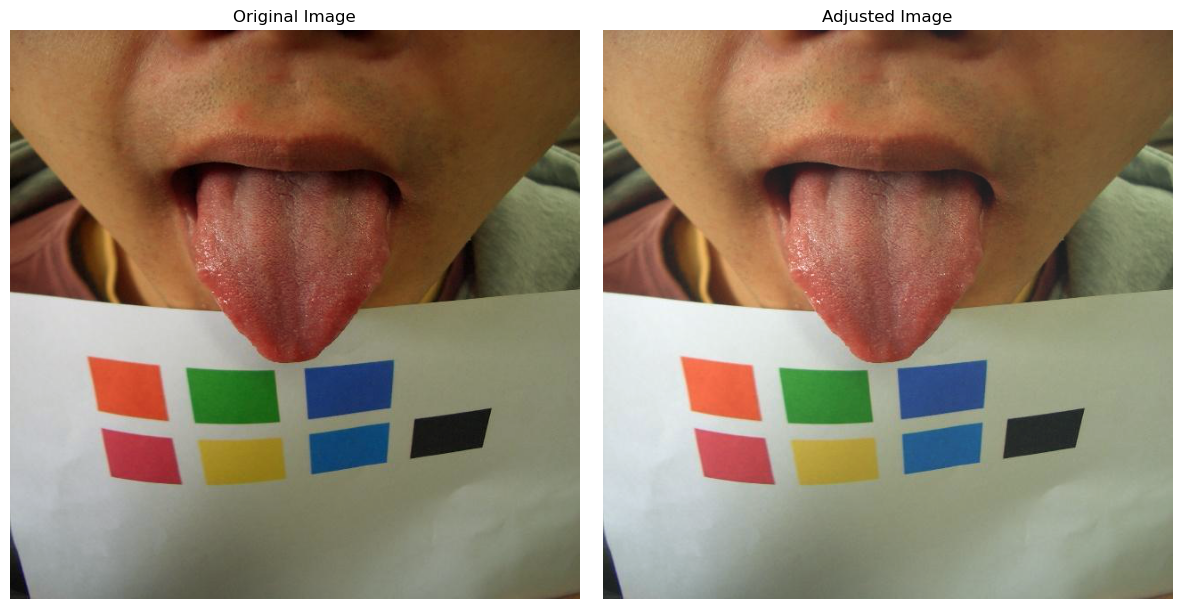

In [12]:
image_name = "yellow_sample_1.png"
image_path = "Samples/" + image_name
image_rgb = io.imread(image_path)

image_lab = rgb2lab(image_rgb)

image_lab[:,:,0] += total_l_diff
image_lab[:,:,1] += total_a_diff
image_lab[:,:,2] += total_b_diff

adjusted_image_rgb = lab2rgb(image_lab)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image_rgb)
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(adjusted_image_rgb)
ax2.set_title("Adjusted Image")
ax2.axis('off')

plt.tight_layout()
plt.show()

io.imsave(f"output/{image_name[:-4]}_corrected.jpg", (adjusted_image_rgb * 255).astype(np.uint8))